In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('csv_files/jena_climate_2009_2016.csv')

In [3]:
df=df[5::6]

In [4]:
df['Date Time']=pd.to_datetime(df['Date Time'])

In [5]:
df=df.set_index('Date Time')

In [6]:
df=df[['T (degC)']]

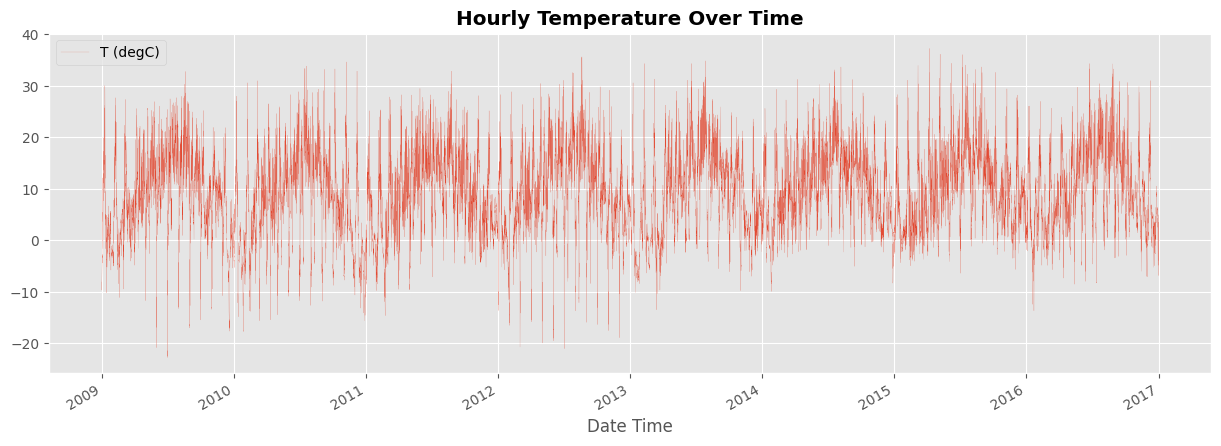

In [7]:
df.plot(figsize=(15,5),lw=0.1)
plt.title('Hourly Temperature Over Time',fontweight='bold')
plt.show()

In [8]:
def df_to_Xy(df,lag):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-lag):
        row=[[r] for r in df_as_np[i:i+lag]]
        label=df_as_np[i+lag]
        X.append(row),y.append(label)
    return np.array(X),np.array(y)  

In [9]:
lag=24
X,y=df_to_Xy(df,lag)

In [10]:
X.shape,y.shape

((70067, 24, 1, 1), (70067, 1))

In [11]:
X_train,y_train=X[:60000],y[:60000]
X_val,y_val=X[60000:65000],y[60000:65000]
X_test,y_test=X[65000:],y[65000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 24, 1, 1),
 (60000, 1),
 (5000, 24, 1, 1),
 (5000, 1),
 (5067, 24, 1, 1),
 (5067, 1))

#  Building LSTM Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [13]:
model=Sequential()
model.add(InputLayer((24,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 35.8140 - root_mean_squared_error: 5.9845

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 40s 20ms/step - loss: 35.7647 - root_mean_squared_error: 5.9804 - val_loss: 1.1634 - val_root_mean_squared_error: 1.0786
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.3152 - root_mean_squared_error: 1.5216

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 42s 23ms/step - loss: 2.3152 - root_mean_squared_error: 1.5216 - val_loss: 0.5416 - val_root_mean_squared_error: 0.7360
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.8851 - root_mean_squared_error: 0.9408

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 41s 22ms/step - loss: 0.8853 - root_mean_squared_error: 0.9409 - val_loss: 0.4674 - val_root_mean_squared_error: 0.6837
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6444 - root_mean_squared_error: 0.8028

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 36s 19ms/step - loss: 0.6444 - root_mean_squared_error: 0.8028 - val_loss: 0.4583 - val_root_mean_squared_error: 0.6770
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5848 - root_mean_squared_error: 0.7647

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 41s 22ms/step - loss: 0.5849 - root_mean_squared_error: 0.7648 - val_loss: 0.4394 - val_root_mean_squared_error: 0.6628
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5636 - root_mean_squared_error: 0.7507

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 36s 19ms/step - loss: 0.5637 - root_mean_squared_error: 0.7508 - val_loss: 0.4378 - val_root_mean_squared_error: 0.6617
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5530 - root_mean_squared_error: 0.7436 - val_loss: 0.4396 - val_root_mean_squared_error: 0.6630
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5475 - root_mean_squared_error: 0.7400

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 39s 21ms/step - loss: 0.5475 - root_mean_squared_error: 0.7399 - val_loss: 0.4350 - val_root_mean_squared_error: 0.6595
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5427 - root_mean_squared_error: 0.7367 - val_loss: 0.4351 - val_root_mean_squared_error: 0.6596
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5410 - root_mean_squared_error: 0.7355

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.5411 - root_mean_squared_error: 0.7356 - val_loss: 0.4313 - val_root_mean_squared_error: 0.6568


In [16]:
from tensorflow.keras.models import load_model
model=load_model('model1/')

159/159 [==============================] - 2s 8ms/step


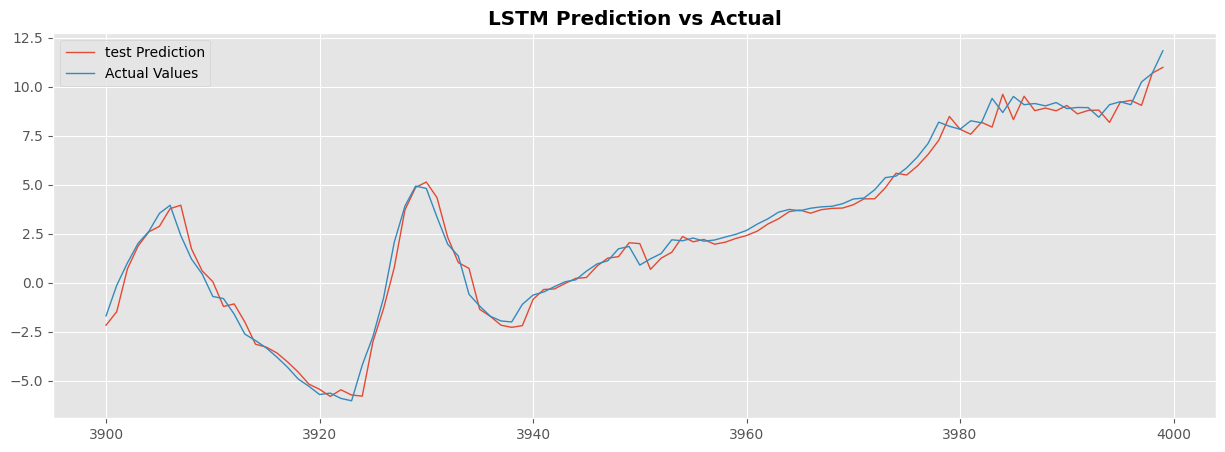

In [17]:
test_prediction=model.predict(X_test).flatten()
test_results=pd.DataFrame(data={'test Prediction':test_prediction,'Actual Values':y_test.flatten()})

test_results.iloc[3900:4000].plot(lw=1,figsize=(15,5))
plt.title('LSTM Prediction vs Actual',fontweight='bold')
plt.show()

#  XGBoost

In [18]:
for i in range(1,25):
    df[f'T (degC)_prev{i}']=df['T (degC)'].shift(i)

In [19]:
train=df.iloc[:65000]
test=df.iloc[65000:]

X_train,X_test,y_train,y_test=train.drop(columns='T (degC)'),test.drop(columns='T (degC)'),train['T (degC)'],test['T (degC)']

In [20]:
from xgboost import XGBRegressor
model=XGBRegressor()

from sklearn import metrics

In [21]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [23]:
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.9946211128436261 0.9921701419081614
0.4346704990973764 0.509941127323605
0.612275555047329 0.7354555419217232


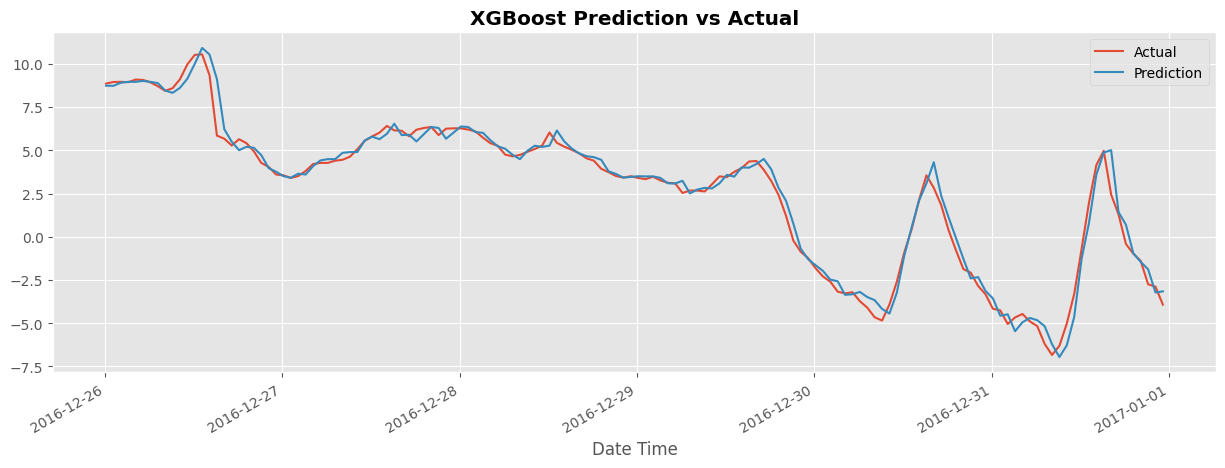

In [24]:
test['Actual']=y_test
test['Prediction']=test_prediction

test[test.index>"2016-12-26"].plot(figsize=(15,5),y=['Actual','Prediction'])
plt.title('XGBoost Prediction vs Actual',fontweight='bold')
plt.show()

In [26]:
# Prediction results are very close for XGBoost and LSTM